预测集是5月25日到5月31日6点到8点，15点到17点的车辆记录，需要预测5月25日到5月31日8点到10点，17点到19点以20分钟为单位的车流
思路：
1.上课讲的那种简单的线性模型
2.用神经网络或者其他机器学习方法做模型（特征有过去多少分钟的流量，占有率，车速，天气情况）

要讨论的问题：
1.具体的station是什么，应该是高速公路？选定一个或几个station进行研究
2.作为过去时间的数据应该怎么选，选几周，可以先画图分析一下同一周每一天的数据分布会不会很不一样？比如预测未来周一那么应该讨论过去几周的周一还是上一周的周一到周五

选择的是3003/corridor_3003_2016_05/3003_pri_2016_05.xls，具体station是'402555'

In [19]:
import pandas as pd
import numpy as np
path = '/Users/mac/Desktop/data/3003/corridor_3003_2016_05/3003_pri_2016_05.xls'
Flow = pd.read_excel(path, sheet_name='Flow')
Flow.head()

,Timestamp,409306,402553,402555,402557,402559,402561,402563,401445,402565,...,402754,402756,402758,402760,402765,402767,402604,402769,402763,406742
0,05/01/2016 00:00,99,192,126,124,164,126,126,94,95,...,63,63,63,63,63,63,63,40,5,41
1,05/01/2016 00:05,88,137,81,86,119,121,121,139,106,...,61,61,61,61,61,61,61,42,4,42
2,05/01/2016 00:10,95,169,113,115,148,121,121,125,92,...,61,61,61,61,61,61,61,42,5,42
3,05/01/2016 00:15,84,181,110,109,168,115,115,125,101,...,57,57,57,57,57,57,57,42,8,42
4,05/01/2016 00:20,85,158,92,108,155,109,109,143,100,...,55,55,55,55,55,55,55,48,8,49


In [20]:
#先取出5月份的数据,station 402555
#每天有288个数据，选出的数据从5月4日开始（这样可以构建完整的三个星期）
flow_data = Flow#[(Flow['Timestamp']>='05/19/2016 00:00') & (Flow['Timestamp']<'05/26/2016 00:00')]
flow_data_402555 = flow_data[['Timestamp',402555]]#[402555]
flow_data_402555 = flow_data_402555[flow_data_402555['Timestamp']>='05/04/2016 00:00']
flow_data_402555.reset_index()#.drop(['index'],axis=1)
flow_data_402555


,Timestamp,402555
864,05/04/2016 00:00,43
865,05/04/2016 00:05,54
866,05/04/2016 00:10,48
867,05/04/2016 00:15,50
868,05/04/2016 00:20,48
869,05/04/2016 00:25,54
870,05/04/2016 00:30,27
871,05/04/2016 00:35,30
872,05/04/2016 00:40,37
873,05/04/2016 00:45,35


In [21]:
#处理第一天的数据
wednesday_h = np.zeros((288,4))
for i in range(4):
    start = 288*7*i
    end = 288*7*i+288
    wednesday_h[:,i] = flow_data_402555.iloc[start:end][402555]


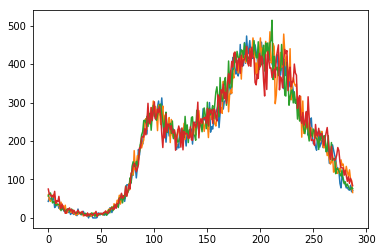

In [22]:
#可视化看效果
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(wednesday_h)
plt.show()

In [23]:
#从五月四日开始
#wednesday_h = np.zeros((288,4))
thrisday_h = np.zeros((288,4))
friday_h = np.zeros((288,4))
saturday_h = np.zeros((288,4))
sunday_h = np.zeros((288,4))
monday_h = np.zeros((288,4))
tuesday_h = np.zeros((288,4))
for i in range(4):
    start = 288+288*7*i
    end = start+288
    thrisday_h[:,i] = flow_data_402555.iloc[start:end][402555]
for i in range(4):
    start = 288*2+288*7*i
    end = start+288
    friday_h[:,i] = flow_data_402555.iloc[start:end][402555]
for i in range(4):
    start = 288*3+288*7*i
    end = start+288
    saturday_h[:,i] = flow_data_402555.iloc[start:end][402555]
for i in range(4):
    start = 288*4+288*7*i
    end = start+288
    sunday_h[:,i] = flow_data_402555.iloc[start:end][402555]
for i in range(4):
    start = 288*5+288*7*i
    end = start+288
    monday_h[:,i] = flow_data_402555.iloc[start:end][402555]   
for i in range(4):
    start = 288*6+288*7*i
    end = start+288
    tuesday_h[:,i] = flow_data_402555.iloc[start:end][402555]    
workday_h = np.zeros((288,20))
weekend_h = np.zeros((288,8))
workday_num = [0,1,2,5,6,7,8,9,12,13,14,15,16,19,20,21,22,23,26,27]
weekend_num = [3,4,10,11,17,18,24,25]
for i in range(20):
    start = 288*workday_num[i]
    end = start+288
    workday_h[:,i] = flow_data_402555.iloc[start:end][402555]
for i in range(8):
    start = 288*weekend_num[i]
    end = start+288
    weekend_h[:,i] = flow_data_402555.iloc[start:end][402555]
    

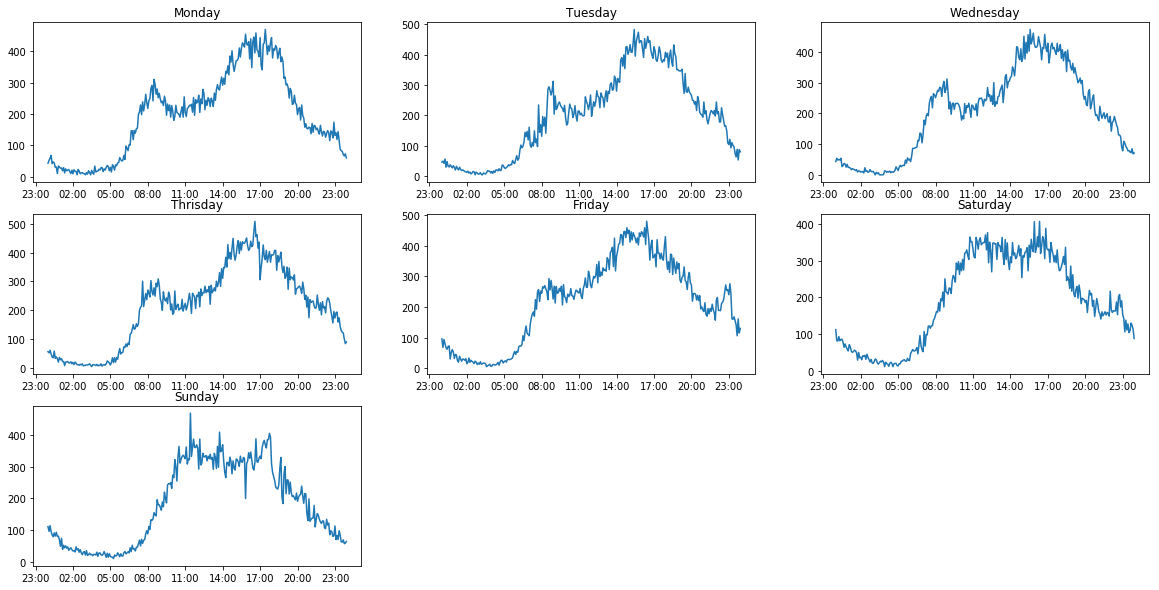

In [24]:
import matplotlib as mpl
%matplotlib inline
date_format = mpl.dates.DateFormatter("%H:%M")
d = '2016-3-4 00:00'
x = pd.date_range(d, periods=288, freq='5min')
plt.figure(figsize=(20,10))  # 创建第一个画板（figure）
ax = plt.subplot(331) # 第一个画板的第一个子图
plt.plot(x,monday_h[:,0])
ax.xaxis.set_major_formatter(date_format)
plt.title('Monday')

ax = plt.subplot(332) 
plt.plot(x,tuesday_h[:,0])
ax.xaxis.set_major_formatter(date_format)
plt.title('Tuesday')
ax = plt.subplot(333) 
plt.plot(x,wednesday_h[:,0])
ax.xaxis.set_major_formatter(date_format)
plt.title('Wednesday')
ax = plt.subplot(334) 
plt.plot(x,thrisday_h[:,0])
ax.xaxis.set_major_formatter(date_format)
plt.title('Thrisday')
ax = plt.subplot(335) 
plt.plot(x,friday_h[:,0])
ax.xaxis.set_major_formatter(date_format)
plt.title('Friday')
ax = plt.subplot(336) 
plt.plot(x,saturday_h[:,0])
ax.xaxis.set_major_formatter(date_format)
plt.title('Saturday')
ax = plt.subplot(337) 
plt.plot(x,sunday_h[:,0])
ax.xaxis.set_major_formatter(date_format)
plt.title('Sunday')
plt.show()

In [25]:
from numpy.linalg import inv
flow_star = workday_h.copy()
flow_predict1 = np.zeros(12*2)#将要预测的区间1
flow_predict2 = np.zeros(12*2)#将要预测的区间1
start = 12*8
history = 6 #代表看依据过去多久的真实测量值进行预测，这里是30min
for i in range(24):
    E_his = np.mean(flow_star[start+i,0:19]) #qf^hat的期望
    S = np.zeros((1,history)) #协方差矩阵
    qf = flow_star[start+i,0:19].T
    for j in range(history):
        qm = flow_star[(start+i-history+j),0:19].T
        S[0,j] = np.cov(np.vstack((qf,qm)))[1,0]
    sigma = np.cov(flow_star[(start+i-history):(start+i),0:19])#自相关矩阵
    delta = flow_star[(start+i-history):(start+i),19]-flow_star[(start+i-history):(start+i),0:19].mean(axis=1)#q_m和E_qm^hat的差
        #delta  
    flow_predict1[i] = E_his + S.dot(inv(sigma).dot(delta))
flow_predict1
y_true = workday_h[start:(start+24),19]
y_pred = flow_predict1
np.mean(np.abs((y_true - y_pred) / y_true)) * 100


12.531508423046347

In [26]:
qf = flow_star[start+i,0:3].T
qm = flow_star[(start+i-history+j),0:3].T
np.cov(np.vstack((qf,qm))),np.corrcoef(np.vstack((qf,qm)))

(array([[ 21.33333333,  49.33333333],
        [ 49.33333333, 324.33333333]]), array([[1.        , 0.59308277],
        [0.59308277, 1.        ]]))

In [27]:
#以5MIN计算MAPE
y_true = workday_h[start:(start+24),19]
y_pred = flow_predict1
np.mean(np.abs((y_true - y_pred) / y_true)) * 100


12.531508423046347

In [28]:
#以20Min计算MAPE
y_true1 = []
y_pred1 = []
for i in range(0,19,4):
    y_pred1.append(np.sum(flow_predict1[i:i+4]))
    y_true1.append(np.sum(y_true[i:i+4]))
np.mean(np.abs(np.array(y_true1) - np.array(y_pred1)) / np.array(y_true1)) * 100

4.024076203387016

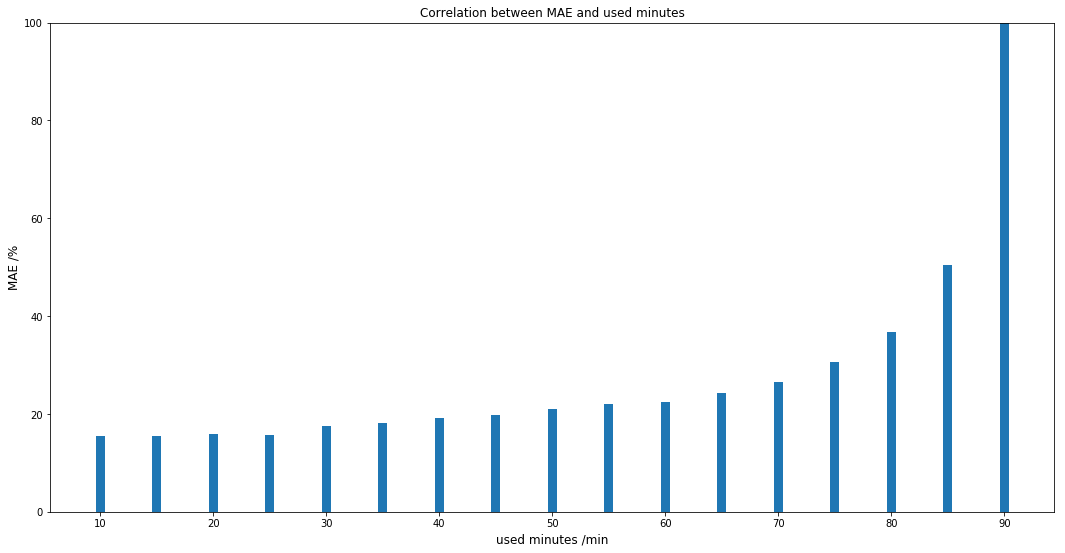

In [37]:
flow_star = workday_h.copy()#预测的源数据
def compute_mae(delay,days):
    predict = np.zeros(12*24-delay)#将要预测的区间1
    start = delay
    for i in range(12*24-delay):
        E_his = np.mean(flow_star[start+i,-days-1:-1]) #qf^hat的期望
        S = np.zeros((1,delay)) #协方差矩阵
        qf = flow_star[start+i,-days-1:-1].T
        for j in range(delay):
            qm = flow_star[(start+i-delay+j),-days-1:-1].T
            S[0,j] = np.cov(np.vstack((qf,qm)))[1,0]
        sigma = np.cov(flow_star[(start+i-delay):(start+i),-days-1:-1])#自相关矩阵
        delta = flow_star[(start+i-delay):(start+i),-1]-flow_star[(start+i-delay):(start+i),-days-1:-1].mean(axis=1)#q_m和E_qm^hat的差
        #delta  
        predict[i] = E_his + S.dot(inv(sigma).dot(delta))
    true = workday_h[start:,19]
    pred = predict
    return np.mean(np.abs((true - pred) / true)) * 100

maes = []
for i in range(2,19):
    maes.append(compute_mae(i,19))
ax = plt.figure()
plt.ylim( 0,100 )
plt.bar(range(10,95,5),maes)
plt.xlabel('used minutes /min',fontsize='large')
plt.ylabel('MAE /%',fontsize='large')
plt.title('Correlation between MAE and used minutes',fontsize='large')
plt.show()


[27.777307372080962, 23.46836369810849, 20.48945651596441, 19.698792324166757, 18.789000229921403, 17.65285753547417, 16.835282747316754, 16.2650067478679, 16.546999525856325, 16.337769569380495, 16.080014870181756, 16.06824207882262, 15.933876728096214, 15.970683634180515, 15.886434075116545]


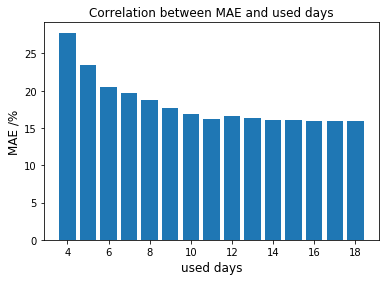

In [30]:
'''
这里探究回顾过去天数对预测的影响
'''
maes = []
for i in range(4,19):
    try:
        maes.append(compute_mae(2,i))
    except:
        print(i)
print(maes)
plt.figure()
plt.bar(range(4,19),maes)
plt.xlabel('used days',fontsize='large')
plt.ylabel('MAE /%',fontsize='large')
plt.title('Correlation between MAE and used days',fontsize='large')
plt.show()

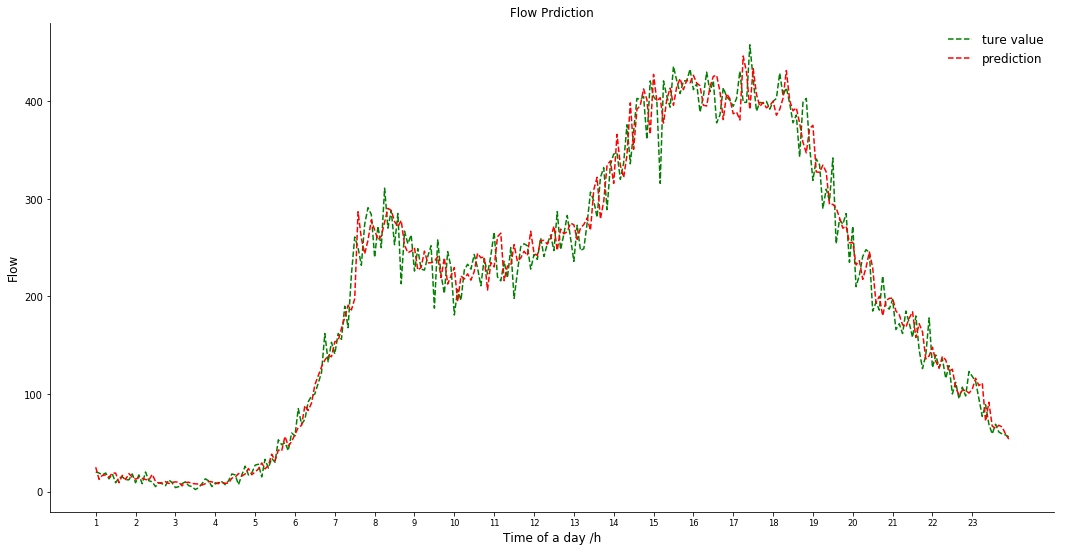

In [35]:
'''
这里探究的是回看过去多久时间内的预测更为可靠，与直觉相反的是，如果回看过去更长时间的数据反而会带来更大幅度的抖动
'''
#预测工作日一天内的
from numpy.linalg import inv
flow_star = workday_h.copy()
flow_predict1 = np.zeros(12*23)
flow_predict2 = np.zeros(12*23)
flow_predict3 = np.zeros(12*23)
start = 12*1
history = 2 #代表看依据过去多久的真实测量值进行预测，这里是10min
for i in range(12*23):
    E_his = np.mean(flow_star[start+i,0:19]) #qf^hat的期望
    S = np.zeros((1,history)) #协方差矩阵
    qf = flow_star[start+i,0:19].T
    for j in range(history):
        qm = flow_star[(start+i-history+j),0:19].T
        S[0,j] = np.cov(np.vstack((qf,qm)))[1,0]
    sigma = np.cov(flow_star[(start+i-history):(start+i),0:19])#自相关矩阵
    delta = flow_star[(start+i-history):(start+i),19]-flow_star[(start+i-history):(start+i),0:19].mean(axis=1)#q_m和E_qm^hat的差
        #delta  
    flow_predict1[i] = E_his + S.dot(inv(sigma).dot(delta))

history = 6 #30min
for i in range(12*23):
    E_his = np.mean(flow_star[start+i,0:19]) #qf^hat的期望
    S = np.zeros((1,history)) #协方差矩阵
    qf = flow_star[start+i,0:19].T
    for j in range(history):
        qm = flow_star[(start+i-history+j),0:19].T
        S[0,j] = np.cov(np.vstack((qf,qm)))[1,0]
    sigma = np.cov(flow_star[(start+i-history):(start+i),0:19])#自相关矩阵
    delta = flow_star[(start+i-history):(start+i),19]-flow_star[(start+i-history):(start+i),0:19].mean(axis=1)#q_m和E_qm^hat的差
        #delta  
    flow_predict2[i] = E_his + S.dot(inv(sigma).dot(delta))
    
history = 12 #1h
for i in range(12*23):
    E_his = np.mean(flow_star[start+i,0:19]) #qf^hat的期望
    S = np.zeros((1,history)) #协方差矩阵
    qf = flow_star[start+i,0:19].T
    for j in range(history):
        qm = flow_star[(start+i-history+j),0:19].T
        S[0,j] = np.cov(np.vstack((qf,qm)))[1,0]
    sigma = np.cov(flow_star[(start+i-history):(start+i),0:19])#自相关矩阵
    delta = flow_star[(start+i-history):(start+i),19]-flow_star[(start+i-history):(start+i),0:19].mean(axis=1)#q_m和E_qm^hat的差
        #delta  
    flow_predict3[i] = E_his + S.dot(inv(sigma).dot(delta))
y_true = list(workday_h[12:,-1])
plt.figure()
plt.plot(y_true,'--g',label = 'ture value')
plt.plot(flow_predict1,'--r',label = 'prediction')
#plt.plot(flow_predict2,label = 'predict based on 30 min')
#plt.plot(flow_predict3,label = 'predict based on 60 min')
plt.xticks(np.arange(0, 276, step=12))
plt.gca().set_xticklabels(np.arange(1,24),  fontsize='small') 
plt.xlabel('Time of a day /h',fontsize='large')
plt.ylabel('Flow',fontsize='large')
plt.title('Flow Prdiction',fontsize='large')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 1, fontsize='large',frameon = False)
plt.rcParams["figure.figsize"] = [18,9]
plt.show()

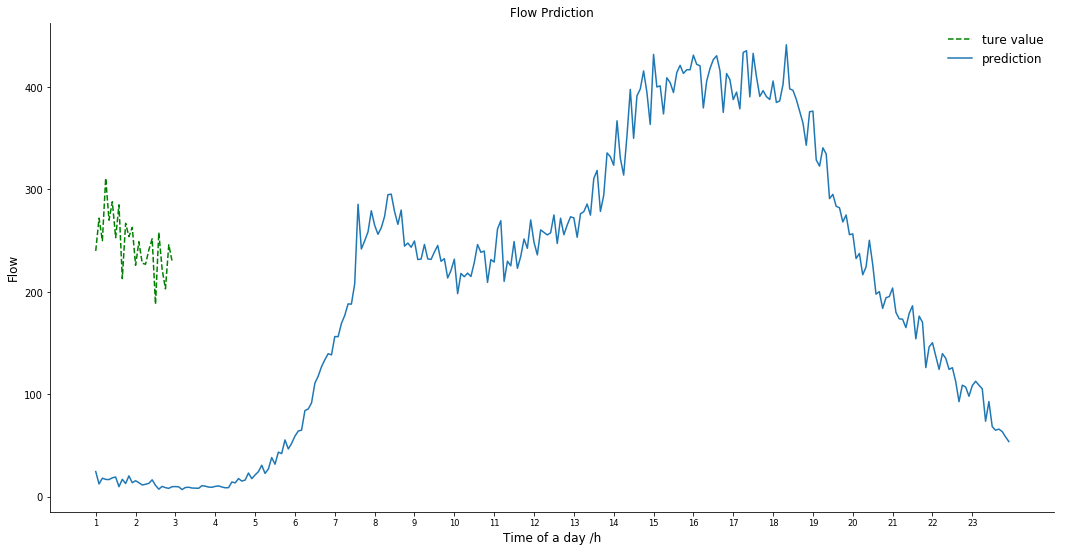

In [33]:
'''
这里探究的是回看过去多久时间内的预测更为可靠，与直觉相反的是，如果回看过去更长时间的数据反而会带来更大幅度的抖动
'''
#预测工作日一天内的
from numpy.linalg import inv
flow_star = workday_h.copy()
flow_predict1 = np.zeros(12*23)
flow_predict2 = np.zeros(12*23)
flow_predict3 = np.zeros(12*23)
start = 12*1
history = 2 #代表看依据过去多久的真实测量值进行预测，这里是10min
for i in range(12*23):
    E_his = np.mean(flow_star[start+i,14:19]) #qf^hat的期望
    S = np.zeros((1,history)) #协方差矩阵
    qf = flow_star[start+i,14:19].T
    for j in range(history):
        qm = flow_star[(start+i-history+j),14:19].T
        S[0,j] = np.cov(np.vstack((qf,qm)))[1,0]
    sigma = np.cov(flow_star[(start+i-history):(start+i),14:19])#自相关矩阵
    delta = flow_star[(start+i-history):(start+i),19]-flow_star[(start+i-history):(start+i),14:19].mean(axis=1)#q_m和E_qm^hat的差
        #delta  
    flow_predict1[i] = E_his + S.dot(inv(sigma).dot(delta))


for i in range(12*23):
    E_his = np.mean(flow_star[start+i,9:19]) #qf^hat的期望
    S = np.zeros((1,history)) #协方差矩阵
    qf = flow_star[start+i,9:19].T
    for j in range(history):
        qm = flow_star[(start+i-history+j),9:19].T
        S[0,j] = np.cov(np.vstack((qf,qm)))[1,0]
    sigma = np.cov(flow_star[(start+i-history):(start+i),9:19])#自相关矩阵
    delta = flow_star[(start+i-history):(start+i),19]-flow_star[(start+i-history):(start+i),9:19].mean(axis=1)#q_m和E_qm^hat的差
        #delta  
    flow_predict2[i] = E_his + S.dot(inv(sigma).dot(delta))
    

for i in range(12*23):
    E_his = np.mean(flow_star[start+i,4:19]) #qf^hat的期望
    S = np.zeros((1,history)) #协方差矩阵
    qf = flow_star[start+i,4:19].T
    for j in range(history):
        qm = flow_star[(start+i-history+j),4:19].T
        S[0,j] = np.cov(np.vstack((qf,qm)))[1,0]
    sigma = np.cov(flow_star[(start+i-history):(start+i),4:19])#自相关矩阵
    delta = flow_star[(start+i-history):(start+i),19]-flow_star[(start+i-history):(start+i),4:19].mean(axis=1)#q_m和E_qm^hat的差
        #delta  
    flow_predict3[i] = E_his + S.dot(inv(sigma).dot(delta))

plt.figure()
plt.plot(y_true,'--g',label = 'ture value')
#plt.plot(flow_predict1,'--r',label = 'predict based on 5 days')
#plt.plot(flow_predict2,label = 'predict based on 10 days')
plt.plot(flow_predict3,label = 'prediction')
plt.xticks(np.arange(0, 276, step=12))
plt.gca().set_xticklabels(np.arange(1,24),  fontsize='small') 
plt.xlabel('Time of a day /h',fontsize='large')
plt.ylabel('Flow',fontsize='large')
plt.title('Flow Prdiction',fontsize='large')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 1, fontsize='large',frameon = False)
plt.rcParams["figure.figsize"] = [18,9]
plt.show()

21.789648059789883


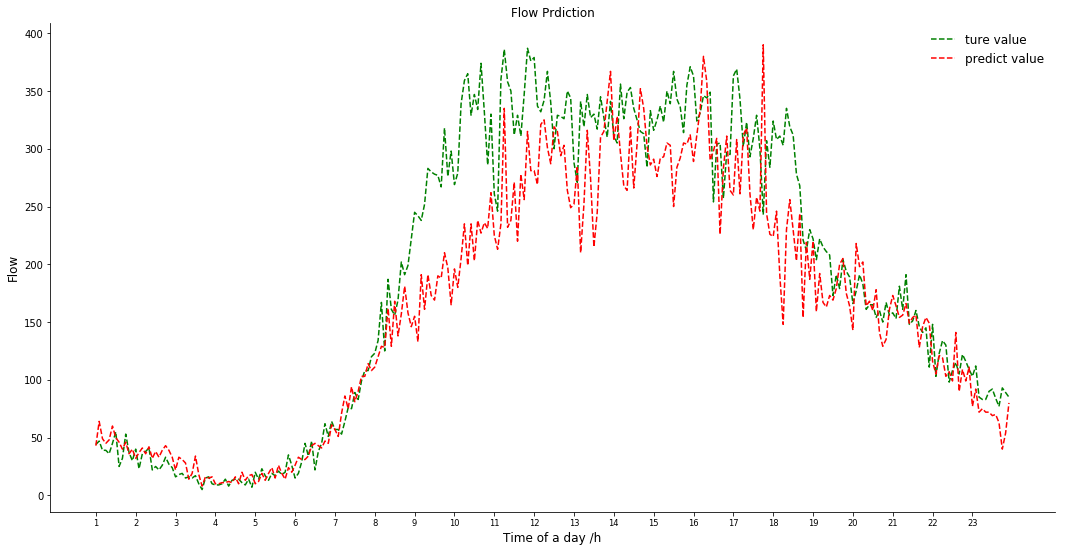

In [20]:
#预测周末一天内的
from numpy.linalg import inv
flow_star = weekend_h.copy()
flow_predict1 = np.zeros(12*23)#将要预测的区间1
start = 12*1
history = 6 #代表看依据过去多久的真实测量值进行预测，这里是1h
for i in range(12*23):
    E_his = np.mean(flow_star[start+i,0:7]) #qf^hat的期望
    S = np.zeros((1,history)) #协方差矩阵
    qf = flow_star[start+i,0:7].T
    for j in range(history):
        qm = flow_star[(start+i-history+j),0:7].T
        S[0,j] = np.cov(np.vstack((qf,qm)))[1,0]
    sigma = np.cov(flow_star[(start+i-history):(start+i),0:7])#自相关矩阵
    delta = flow_star[(start+i-history):(start+i),3]-flow_star[(start+i-history):(start+i),0:7].mean(axis=1)#q_m和E_qm^hat的差
        #delta  
    flow_predict1[i] = E_his + S.dot(inv(sigma).dot(delta))
y_true = weekend_h[start:(start+12*23),7]
y_pred = flow_predict1
print(np.mean(np.abs((y_true - y_pred) / y_true)) * 100)

plt.figure()
plt.plot(y_true,'--g',label = 'ture value')
plt.plot(y_pred,'--r',label = 'predict value')
plt.xticks(np.arange(0, 276, step=12))
plt.gca().set_xticklabels(np.arange(1,24),  fontsize='small') 
plt.xlabel('Time of a day /h',fontsize='large')
plt.ylabel('Flow',fontsize='large')
plt.title('Flow Prdiction',fontsize='large')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 1, fontsize='large',frameon = False)
plt.rcParams["figure.figsize"] = [18,9]


In [51]:
#最后校验需要
#5月25日到5月31日8点到10点，17点到19点以20分钟为单位的车流
merge_list = []
for i in range(25,32):
    start = '05/{}/2016 08:00'.format(i)
    end = '05/{}/2016 10:00'.format(i)
    merge_list.append(Flow[(Flow['Timestamp']>=start) & (Flow['Timestamp']<end)])
    start = '05/{}/2016 17:00'.format(i)
    end = '05/{}/2016 19:00'.format(i)
    merge_list.append(Flow[(Flow['Timestamp']>=start) & (Flow['Timestamp']<end)])
flow_ans = pd.concat(merge_list).reset_index()
#ans=flow_ans.groupby(flow_ans.index // 4 * 4).sum().iloc[:,1:].reset_index().drop(['index'],axis=1)
flow_ans.groupby(flow_ans.index // 4 * 4).sum()



,index,409306,402553,402555,402557,402559,402561,402563,401445,402565,...,402754,402756,402758,402760,402765,402767,402604,402769,402763,406742
0,28038,506,1202,1062,1052,1116,1556,1556,788,950,...,779,779,779,779,779,779,779,312,156,312
4,28054,495,1209,1106,1103,1164,1552,1552,914,1006,...,776,776,776,776,776,776,776,291,145,291
8,28070,495,1209,1047,1050,1080,1513,1513,918,1007,...,759,759,759,759,759,759,759,262,148,262
12,28086,475,1087,896,969,1005,1351,1351,784,820,...,676,676,676,676,676,676,676,234,121,234
16,28102,480,1129,941,936,1033,1311,1311,888,860,...,653,653,653,653,653,653,653,258,145,258
20,28118,496,1131,911,911,1028,1309,1309,860,840,...,656,656,656,656,656,656,656,237,154,240
24,28470,470,1420,1509,1606,1411,1493,1493,1201,1322,...,747,747,747,747,747,747,747,336,182,336
28,28486,498,1479,1556,1543,1400,1566,1566,1301,1348,...,784,784,784,784,784,784,784,366,184,366
32,28502,483,1494,1549,1589,1402,1541,1541,1343,1428,...,769,769,769,769,769,769,769,334,166,334
36,28518,520,1475,1583,1582,1406,1559,1559,1379,1481,...,781,781,781,781,781,781,781,300,132,300


In [128]:
import datetime
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
# flow_data = Flow#[(Flow['Timestamp']>='05/19/2016 00:00') & (Flow['Timestamp']<'05/26/2016 00:00')]
# flow_data_402555 = flow_data[['Timestamp',402555]]#[402555]
# flow_data_402555 = flow_data_402555[flow_data_402555['Timestamp']>='05/04/2016 00:00'].set_index('Timestamp')
# flow_data_402555_train = flow_data_402555.iloc[:-288,:]
# flow_data_402555_pred = flow_data_402555.iloc[-288:,:]
# flow_data_402555_train

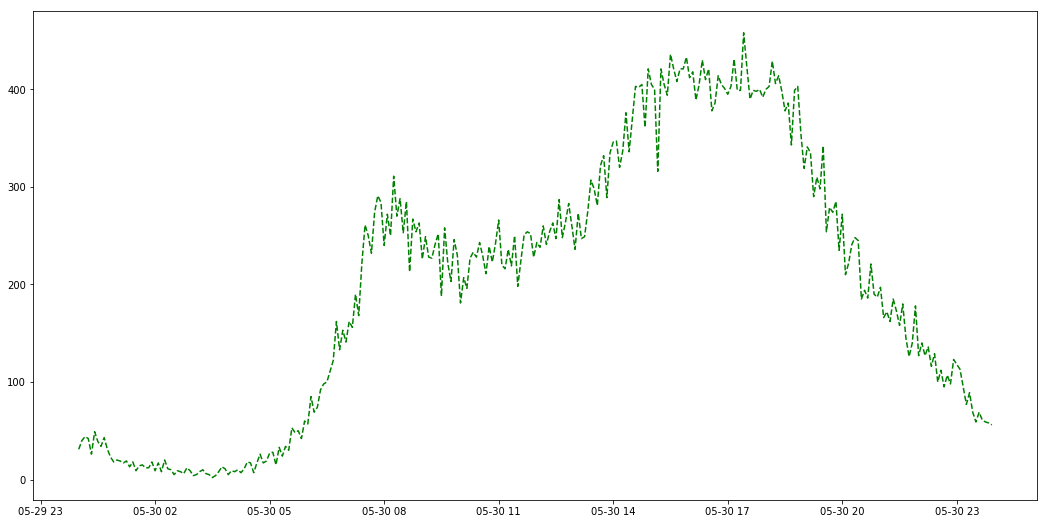

In [153]:
#simu = workday_h.reshape((-1,1))
data = pd.DataFrame(workday_h[:,-1])
data = data.set_index(pd.date_range('2016/5/30','2016/5/31',freq = '5min')[:-1])
dta = data[0]
plt.figure()
plt.plot(dta,'--g',label = 'ture value')
plt.show()

In [154]:
#平稳性检验
result = ADF(dta)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.059515
p-value: 0.261102


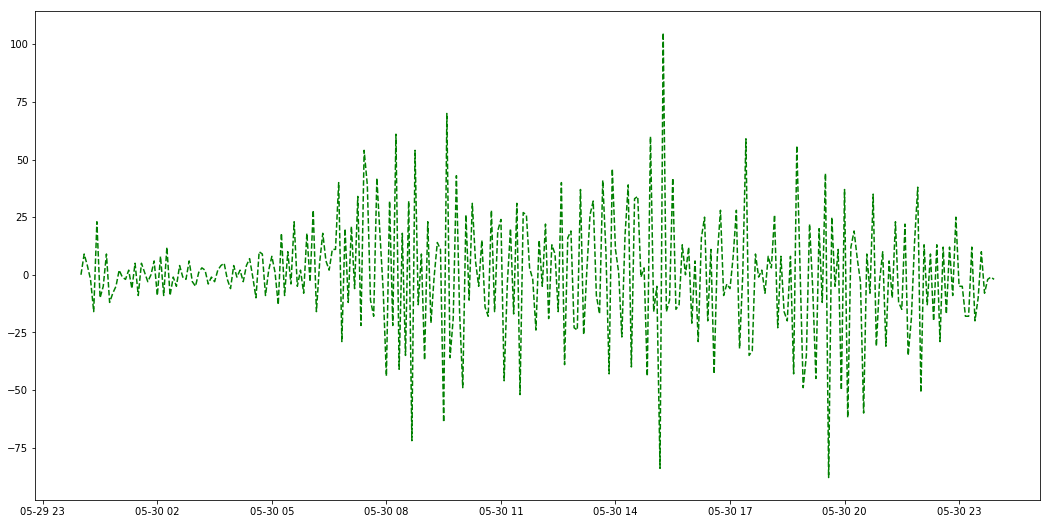

0.08680555555555555


In [155]:
diff1= dta.diff(1)
diff1.fillna(0,inplace=True)
plt.figure()
plt.plot(diff1,'--g',label = 'ture value')
plt.show()
print(diff1.mean())

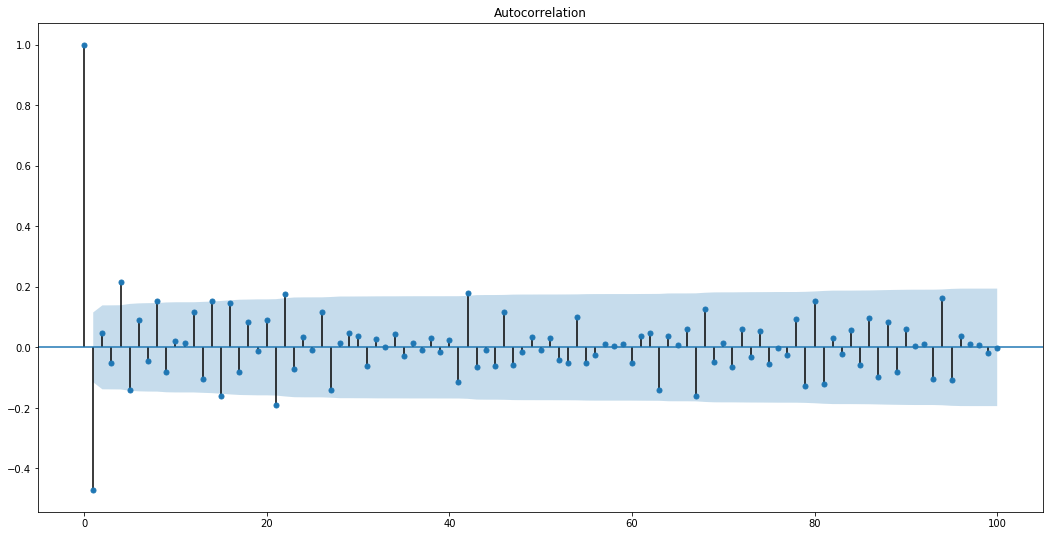

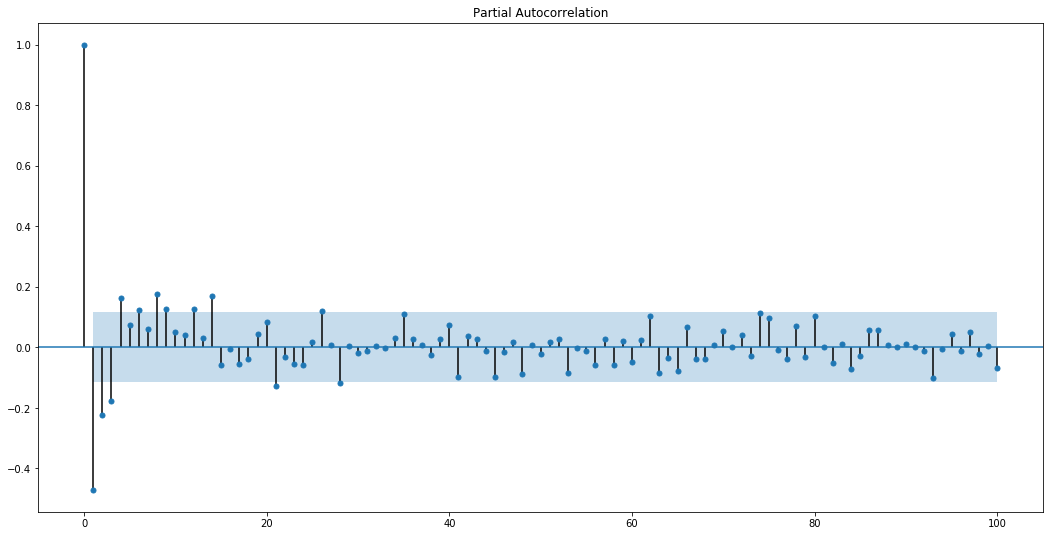

In [156]:
plot_acf(diff1,lags=100)
plot_pacf(diff1,lags=100)
plt.show()

In [157]:
arima110 = sm.tsa.ARIMA(dta,(1,1,0)).fit()#maybe try p,q = 4,5

/Users/mac/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1333: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/mac/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/mac/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1342: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be inte

/Users/mac/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


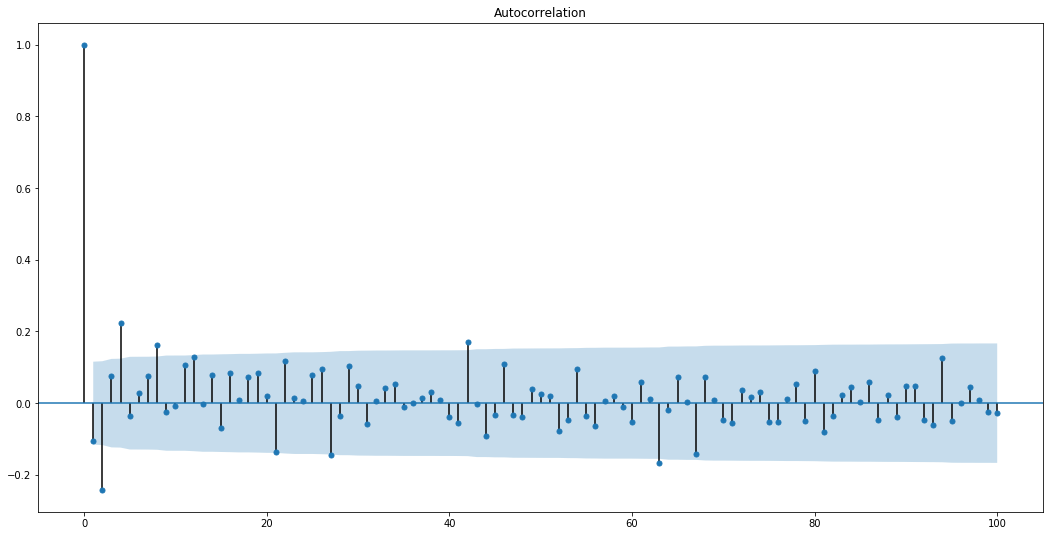

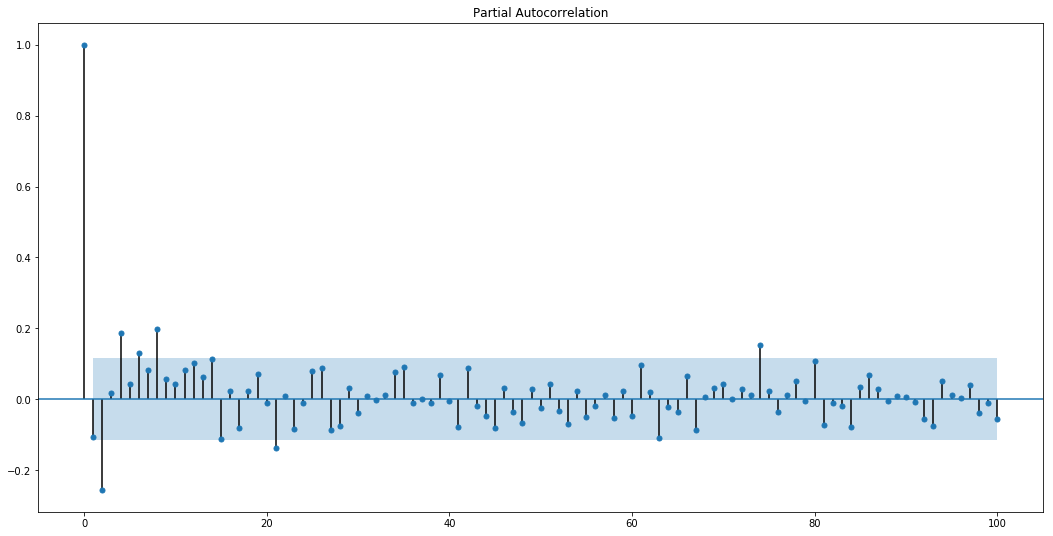

In [158]:
resid = arima110.resid #残差
fig = plt.figure(figsize=(12,8))
plot_acf(resid.values.squeeze(), lags=100)
plot_pacf(resid, lags=100)
plt.show()

/Users/mac/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


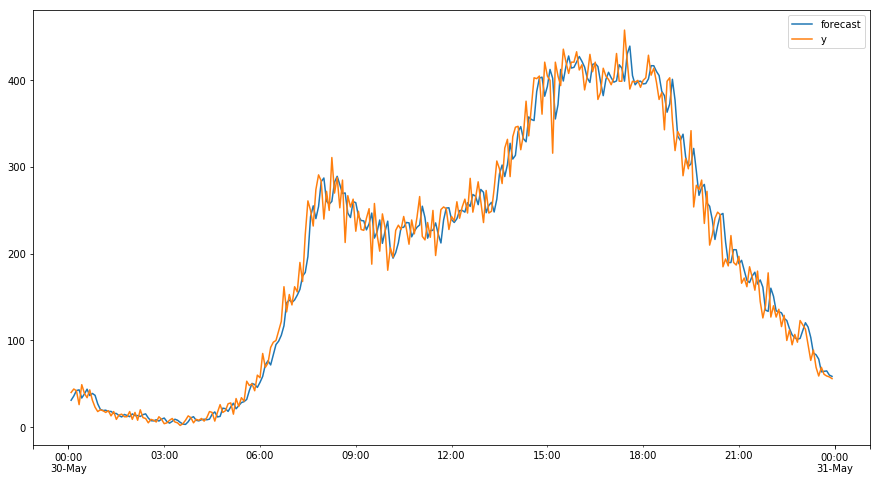

In [147]:
fig = arima110.plot_predict(pd.to_datetime('2016-05-30 00:05:00'),
                        pd.to_datetime('2016-05-30 23:55:00'), 
                            dynamic=False, plot_insample=True)
#'2016/5/30','2016/5/31',freq = '5min'
fig.set_figwidth(15)
fig.set_figheight(8)
plt.show()



In [162]:
arima_predict = arima110.predict(pd.to_datetime('2016-05-30 00:05:00'),
                        pd.to_datetime('2016-05-30 23:55:00'),typ='levels')

/Users/mac/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


15.464646573292082


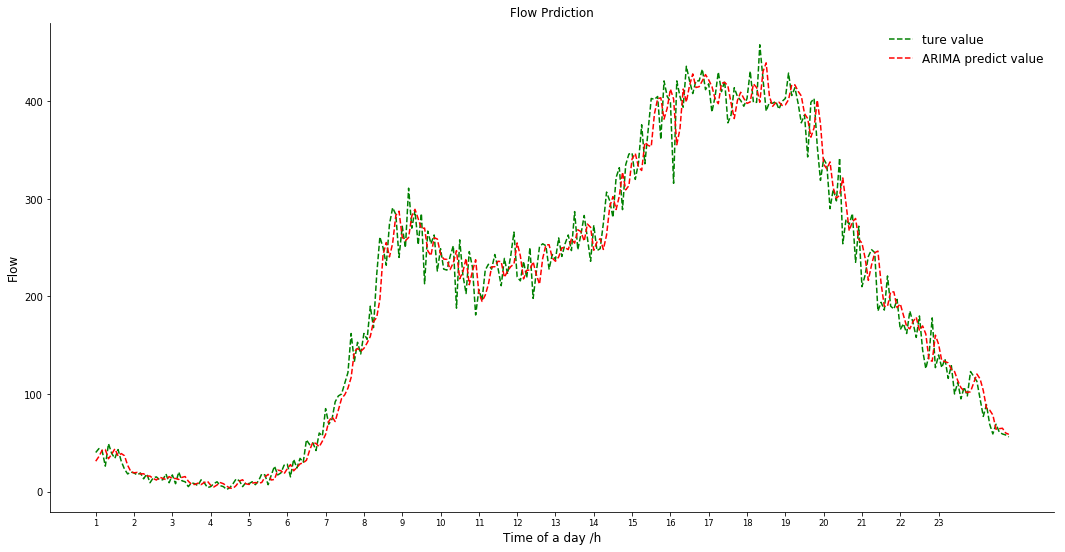

In [171]:
y_true = list(workday_h[1:,-1])
y_pred = list(arima_predict)
print(np.mean(np.abs((workday_h[1:,-1]) - arima_predict) / workday_h[1:,-1]) * 100)

plt.figure()
plt.plot(y_true,'--g',label = 'ture value')
plt.plot(y_pred,'--r',label = 'ARIMA predict value')
plt.xticks(np.arange(0, 276, step=12))
plt.gca().set_xticklabels(np.arange(1,24),  fontsize='small') 
plt.xlabel('Time of a day /h',fontsize='large')
plt.ylabel('Flow',fontsize='large')
plt.title('Flow Prdiction',fontsize='large')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 1, fontsize='large',frameon = False)
plt.rcParams["figure.figsize"] = [18,9]

In [166]:
arima_predict

2016-05-30 00:05:00     31.079508
2016-05-30 00:10:00     35.899209
2016-05-30 00:15:00     42.242296
2016-05-30 00:20:00     43.054002
2016-05-30 00:25:00     33.614648
2016-05-30 00:30:00     38.338563
2016-05-30 00:35:00     43.802942
2016-05-30 00:40:00     36.459854
2016-05-30 00:45:00     38.899209
2016-05-30 00:50:00     36.740177
2016-05-30 00:55:00     26.865707
2016-05-30 01:00:00     20.459854
2016-05-30 01:05:00     19.179532
2016-05-30 01:10:00     19.585384
2016-05-30 01:15:00     18.054002
2016-05-30 01:20:00     18.179532
2016-05-30 01:25:00     15.928472
2016-05-30 01:30:00     15.773679
2016-05-30 01:35:00     13.334325
2016-05-30 01:40:00     11.773679
2016-05-30 01:45:00     14.648149
2016-05-30 01:50:00     13.522619
2016-05-30 01:55:00     12.116767
2016-05-30 02:00:00     15.305061
2016-05-30 02:05:00     13.334325
2016-05-30 02:10:00     13.367826
2016-05-30 02:15:00     12.334325
2016-05-30 02:20:00     14.493356
2016-05-30 02:25:00     15.334325
2016-05-30 02:

In [172]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a.reshape(1, -1)

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])